In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
w_train = pd.read_csv("weather_train.csv")
w_test = pd.read_csv("weather_test.csv")
meta_building = pd.read_csv("building_metadata.csv")

In [0]:
mer_data = pd.merge(train, meta_building, on = 'building_id')

In [0]:
mer2_data = mer_data[(mer_data['site_id']==2)&(mer_data['primary_use']=='Office')]

In [9]:
mer2_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
1620351,157,0,2016-01-01 00:00:00,28.10,2,Office,5258,NaN,NaN
1620352,157,0,2016-01-01 01:00:00,26.57,2,Office,5258,NaN,NaN
1620353,157,0,2016-01-01 02:00:00,25.73,2,Office,5258,NaN,NaN
1620354,157,0,2016-01-01 03:00:00,25.96,2,Office,5258,NaN,NaN
1620355,157,0,2016-01-01 04:00:00,25.59,2,Office,5258,NaN,NaN


In [0]:
office2 = mer2_data[(mer2_data['site_id']==2)&(mer2_data['primary_use']=='Office')]

In [11]:
office2.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
1620351,157,0,2016-01-01 00:00:00,28.10,2,Office,5258,NaN,NaN
1620352,157,0,2016-01-01 01:00:00,26.57,2,Office,5258,NaN,NaN
1620353,157,0,2016-01-01 02:00:00,25.73,2,Office,5258,NaN,NaN
1620354,157,0,2016-01-01 03:00:00,25.96,2,Office,5258,NaN,NaN
1620355,157,0,2016-01-01 04:00:00,25.59,2,Office,5258,NaN,NaN


In [0]:
office2 = office2.drop(columns=['year_built', 'floor_count'])

In [0]:
site2_weather = w_train[w_train['site_id'] == 2]

In [0]:
exo2 = site2_weather[['timestamp','air_temperature','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_speed']]
exo2 = exo2.fillna(method='bfill')

total_2 = pd.merge(office2,exo2, how='outer', on='timestamp').fillna(method='bfill')

In [18]:
total_2.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,157,0,2016-01-01 00:00:00,28.1000,2,Office,5258,15.6,-5.6,0.0,1015.3,3.6
1,158,0,2016-01-01 00:00:00,19.4900,2,Office,10135,15.6,-5.6,0.0,1015.3,3.6
2,171,0,2016-01-01 00:00:00,33.1100,2,Office,131797,15.6,-5.6,0.0,1015.3,3.6
3,171,1,2016-01-01 00:00:00,0.0000,2,Office,131797,15.6,-5.6,0.0,1015.3,3.6
4,171,3,2016-01-01 00:00:00,5.8614,2,Office,131797,15.6,-5.6,0.0,1015.3,3.6


In [0]:
tmp_total_2= total_2.copy()
tmp_total_2['timestamp'] = pd.to_datetime(tmp_total_2['timestamp'])

In [25]:
tmp_total_2.tail()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
409245,287,1,2016-12-31 23:00:00,1.2309,2,Office,33713,16.7,10.0,0.0,1011.0,2.6
409246,287,3,2016-12-31 23:00:00,0.0000,2,Office,33713,16.7,10.0,0.0,1011.0,2.6
409247,290,0,2016-12-31 23:00:00,22.2000,2,Office,51732,16.7,10.0,0.0,1011.0,2.6
409248,290,1,2016-12-31 23:00:00,0.1758,2,Office,51732,16.7,10.0,0.0,1011.0,2.6
409249,171,1,2016-03-23 16:00:00,245.0890,2,Office,131797,16.7,-7.8,0.0,1016.2,7.7


In [0]:
tmp_total_2 = tmp_total_2.set_index("timestamp")

In [27]:
tmp_total_2.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
timestamp,,,,,,,,,,,
2016-01-01,157,0,28.1000,2,Office,5258,15.6,-5.6,0.0,1015.3,3.6
2016-01-01,158,0,19.4900,2,Office,10135,15.6,-5.6,0.0,1015.3,3.6
2016-01-01,171,0,33.1100,2,Office,131797,15.6,-5.6,0.0,1015.3,3.6
2016-01-01,171,1,0.0000,2,Office,131797,15.6,-5.6,0.0,1015.3,3.6
2016-01-01,171,3,5.8614,2,Office,131797,15.6,-5.6,0.0,1015.3,3.6


In [0]:
tmp_total_2 = tmp_total_2.drop(columns = ['building_id', 'square_feet'])

In [0]:
daily_total2 = tmp_total_2.resample("D").sum()

In [49]:
site2_weather[site2_weather.air_temperature>=0]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
17547,2,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
17548,2,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
17549,2,2016-01-01 02:00:00,13.3,2.0,-5.6,0.0,1016.0,270.0,3.1
17550,2,2016-01-01 03:00:00,12.2,0.0,-6.1,0.0,1016.6,280.0,3.1
17551,2,2016-01-01 04:00:00,11.7,2.0,-6.7,0.0,1017.0,270.0,3.1
...,...,...,...,...,...,...,...,...,...
26325,2,2016-12-31 19:00:00,15.0,4.0,11.1,0.0,1012.4,210.0,3.6
26326,2,2016-12-31 20:00:00,16.1,NaN,10.0,0.0,1011.7,260.0,3.6
26327,2,2016-12-31 21:00:00,16.7,4.0,9.4,0.0,1011.2,240.0,4.6
26328,2,2016-12-31 22:00:00,16.7,NaN,10.0,0.0,1011.0,250.0,3.6


In [0]:
daily_total2 = daily_total2.reset_index()

In [0]:
import holidays
date_tmp = daily_total2['timestamp']
date_tmp2 = date_tmp.dt.strftime("%Y-%m-%d")

df_holidays = pd.DataFrame(holidays.UnitedStates(years=2016).keys())
holiday_dummy_list = [ 1 if i in list(pd.to_datetime(df_holidays[0])) else 0 for i in list(pd.to_datetime(date_tmp2))]
daily_total2['holiday'] = pd.DataFrame({'holiday' : holiday_dummy_list})

In [0]:
import calendar

tmp_date = daily_total2.copy()
tmp_date = tmp_date.rename(columns = {'timestamp' : 'weekday'})
tmp_date= pd.DataFrame(tmp_date.set_index('weekday').index.weekday)


dum_day_of_week = pd.get_dummies(tmp_date['weekday'].apply(lambda x: calendar.day_name[x]))

In [42]:
dum_day_of_week.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0


In [0]:
daily_total2 = pd.concat([daily_total2,dum_day_of_week], axis = 1)

In [0]:
daily_total2['weekend'] = daily_total2['Saturday'] + daily_total2['Sunday']

In [52]:
daily_total2.head()

,timestamp,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
0,2016-01-01,817,67212.5919,2210,10786.1,-5104.7,0.0,1124634.9,989.0,1,1,0,0,0,0,0,0,0
1,2016-01-02,816,71703.0717,2208,15235.2,92.0,0.0,1125440.6,3652.4,0,0,0,1,0,0,0,0,1
2,2016-01-03,818,69800.9740,2212,17035.3,-45.4,0.0,1125285.2,4226.4,0,0,0,0,1,0,0,0,1
3,2016-01-04,831,83512.7953,2228,17465.8,2300.1,1317.0,1126119.5,4272.7,0,0,1,0,0,0,0,0,0
4,2016-01-05,832,82037.8680,2236,13794.4,11066.0,1843.0,1132242.6,4069.1,0,0,0,0,0,0,1,0,0


In [53]:
daily_total2.isnull().sum()

timestamp             0
meter                 0
meter_reading         0
site_id               0
air_temperature       0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_speed            0
holiday               0
Friday                0
Monday                0
Saturday              0
Sunday                0
Thursday              0
Tuesday               0
Wednesday             0
weekend               0
dtype: int64

In [54]:
daily_total2.head()

,timestamp,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
0,2016-01-01,817,67212.5919,2210,10786.1,-5104.7,0.0,1124634.9,989.0,1,1,0,0,0,0,0,0,0
1,2016-01-02,816,71703.0717,2208,15235.2,92.0,0.0,1125440.6,3652.4,0,0,0,1,0,0,0,0,1
2,2016-01-03,818,69800.9740,2212,17035.3,-45.4,0.0,1125285.2,4226.4,0,0,0,0,1,0,0,0,1
3,2016-01-04,831,83512.7953,2228,17465.8,2300.1,1317.0,1126119.5,4272.7,0,0,1,0,0,0,0,0,0
4,2016-01-05,832,82037.8680,2236,13794.4,11066.0,1843.0,1132242.6,4069.1,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [0]:
scaled_daily_total2 = daily_total2.copy()

In [0]:
float_array = scaled_daily_total2.iloc[:,2].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,2]=scaled_array


In [59]:
scaled_daily_total2.head()

,timestamp,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
0,2016-01-01,817,0.023241,2210,10786.1,-5104.7,0.0,1124634.9,989.0,1,1,0,0,0,0,0,0,0
1,2016-01-02,816,0.055394,2208,15235.2,92.0,0.0,1125440.6,3652.4,0,0,0,1,0,0,0,0,1
2,2016-01-03,818,0.041774,2212,17035.3,-45.4,0.0,1125285.2,4226.4,0,0,0,0,1,0,0,0,1
3,2016-01-04,831,0.139954,2228,17465.8,2300.1,1317.0,1126119.5,4272.7,0,0,1,0,0,0,0,0,0
4,2016-01-05,832,0.129393,2236,13794.4,11066.0,1843.0,1132242.6,4069.1,0,0,0,0,0,0,1,0,0


In [0]:
float_array = scaled_daily_total2.iloc[:,4].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,4]=scaled_array


In [0]:
float_array = scaled_daily_total2.iloc[:,5].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,5]=scaled_array


In [0]:
float_array = scaled_daily_total2.iloc[:,6].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,6]=scaled_array


In [0]:
float_array = scaled_daily_total2.iloc[:,7].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,7]=scaled_array


In [0]:
float_array = scaled_daily_total2.iloc[:,8].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,8]=scaled_array


In [65]:
scaled_daily_total2.head()

,timestamp,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
0,2016-01-01,817,0.023241,2210,0.063905,0.171951,0.029630,0.567326,0.005754,1,1,0,0,0,0,0,0,0
1,2016-01-02,816,0.055394,2208,0.185752,0.318427,0.029630,0.579207,0.360500,0,0,0,1,0,0,0,0,1
2,2016-01-03,818,0.041774,2212,0.235051,0.314555,0.029630,0.576915,0.436953,0,0,0,0,1,0,0,0,1
3,2016-01-04,831,0.139954,2228,0.246841,0.380666,0.237195,0.589218,0.443120,0,0,1,0,0,0,0,0,0
4,2016-01-05,832,0.129393,2236,0.146293,0.627745,0.320095,0.679508,0.416002,0,0,0,0,0,0,1,0,0


In [0]:
scaled_daily_total2 =  scaled_daily_total2.set_index("timestamp")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


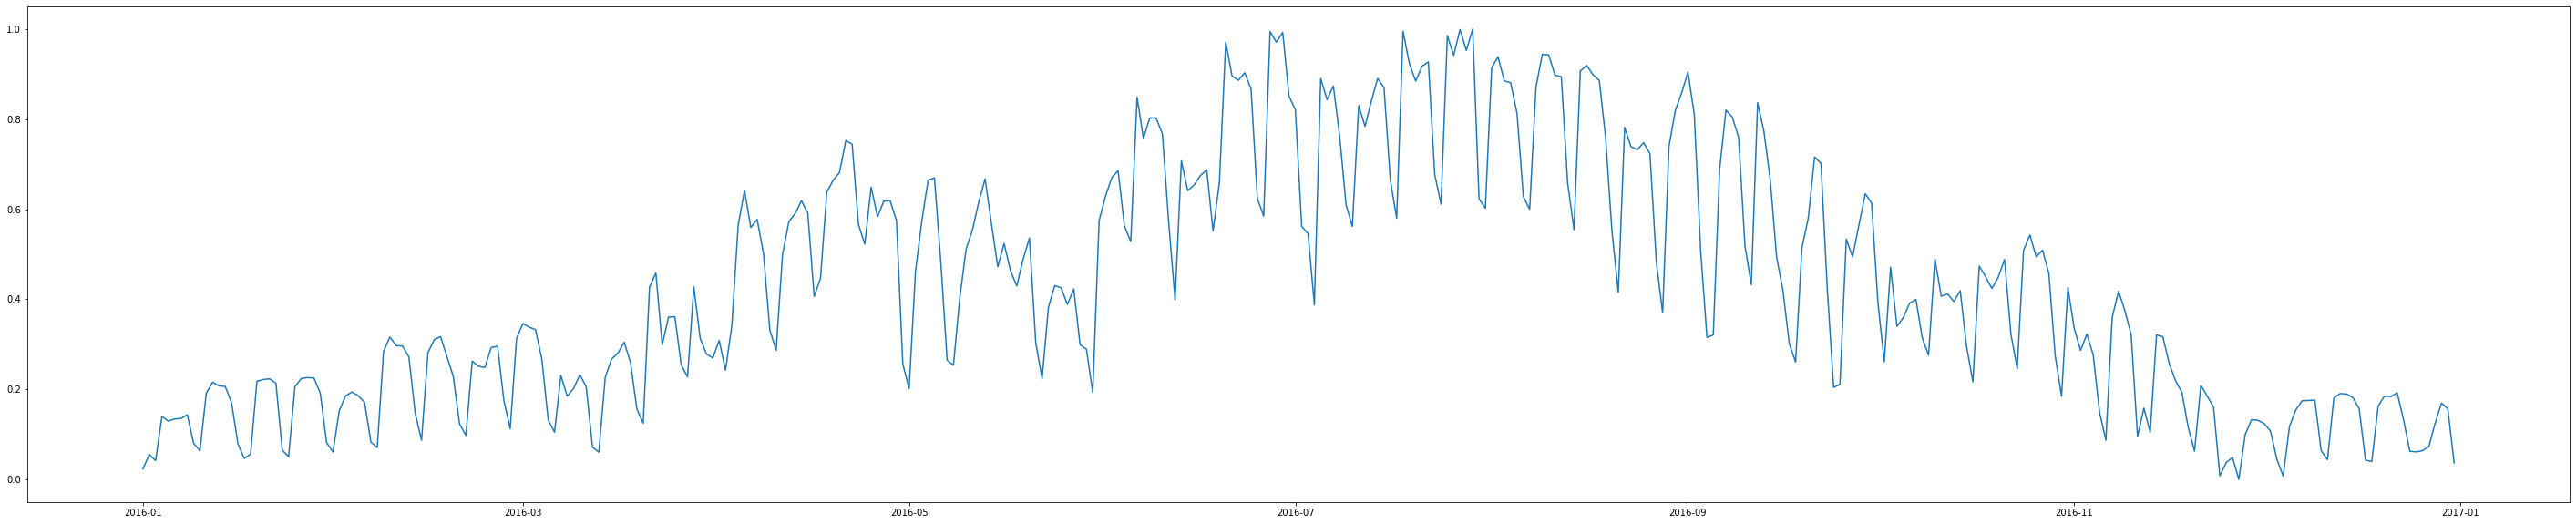

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,10))
plt.plot(scaled_daily_total2.meter_reading)

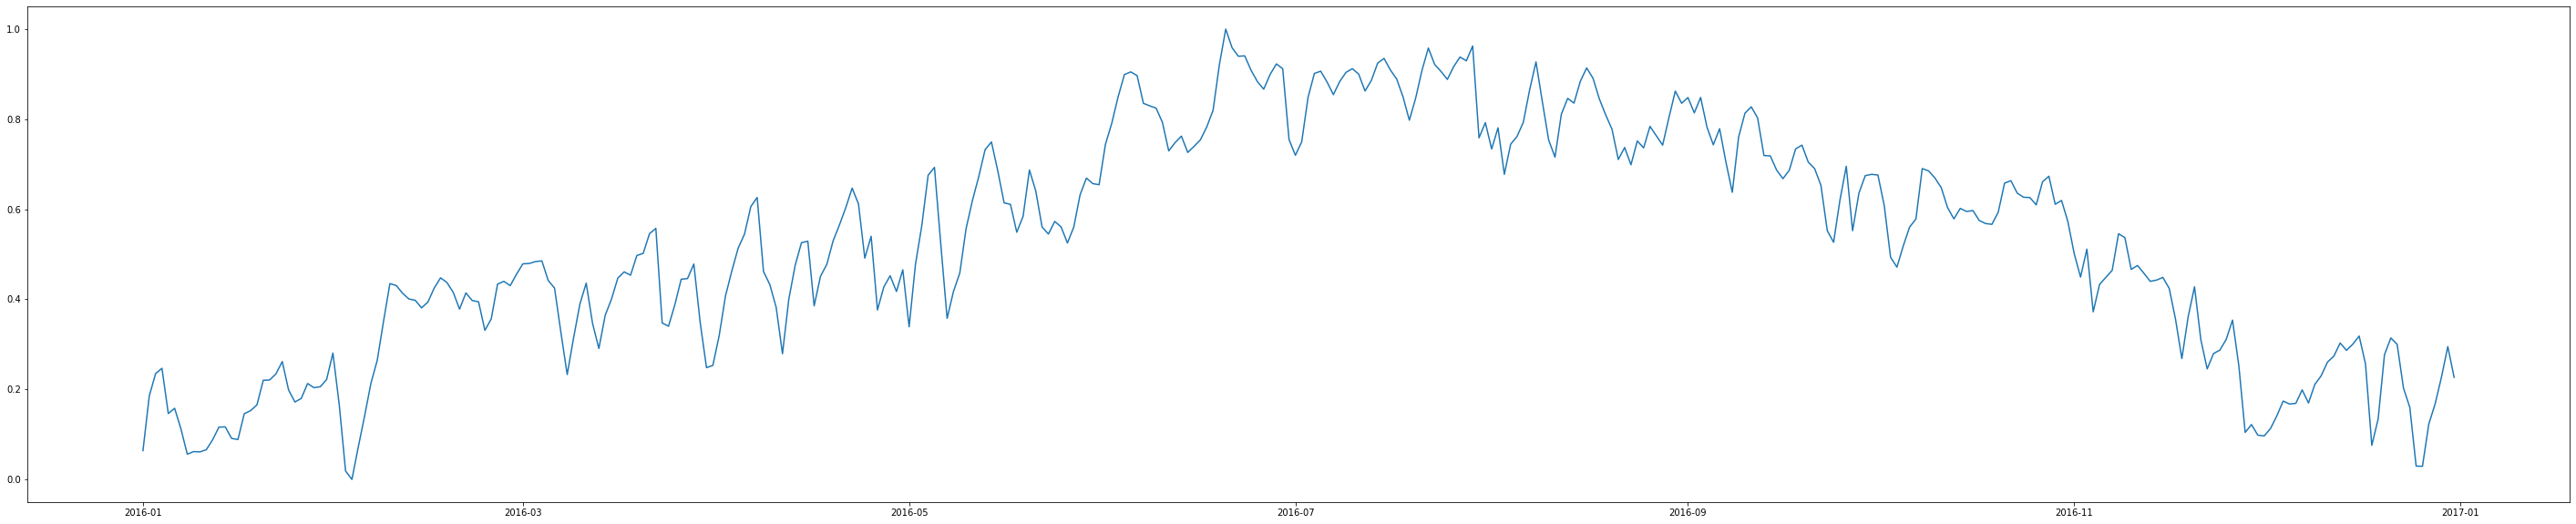

In [73]:
fig = plt.figure(figsize=(50,10))
plt.plot(scaled_daily_total2.air_temperature)

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

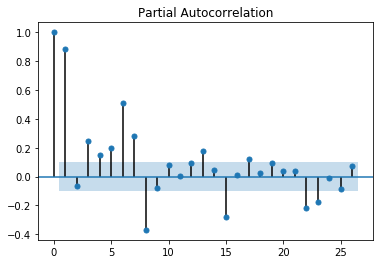

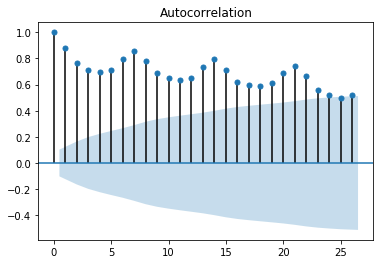

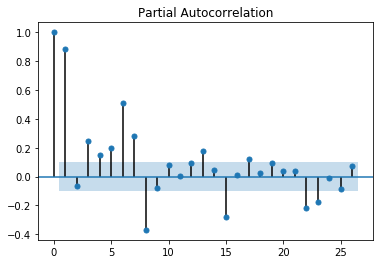

In [76]:
plot_acf(scaled_daily_total2.meter_reading)
plot_pacf(scaled_daily_total2.meter_reading)

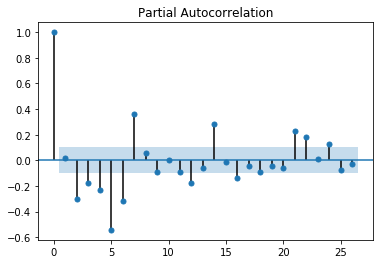

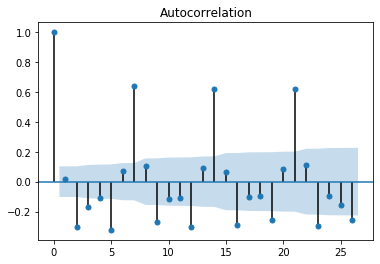

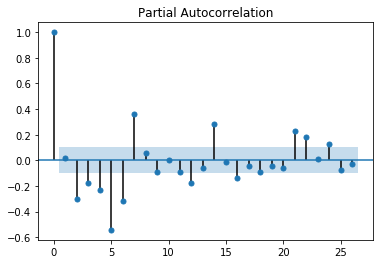

In [79]:
plot_acf(scaled_daily_total2.meter_reading.diff(1).dropna())
plot_pacf(scaled_daily_total2.meter_reading.diff(1).dropna())

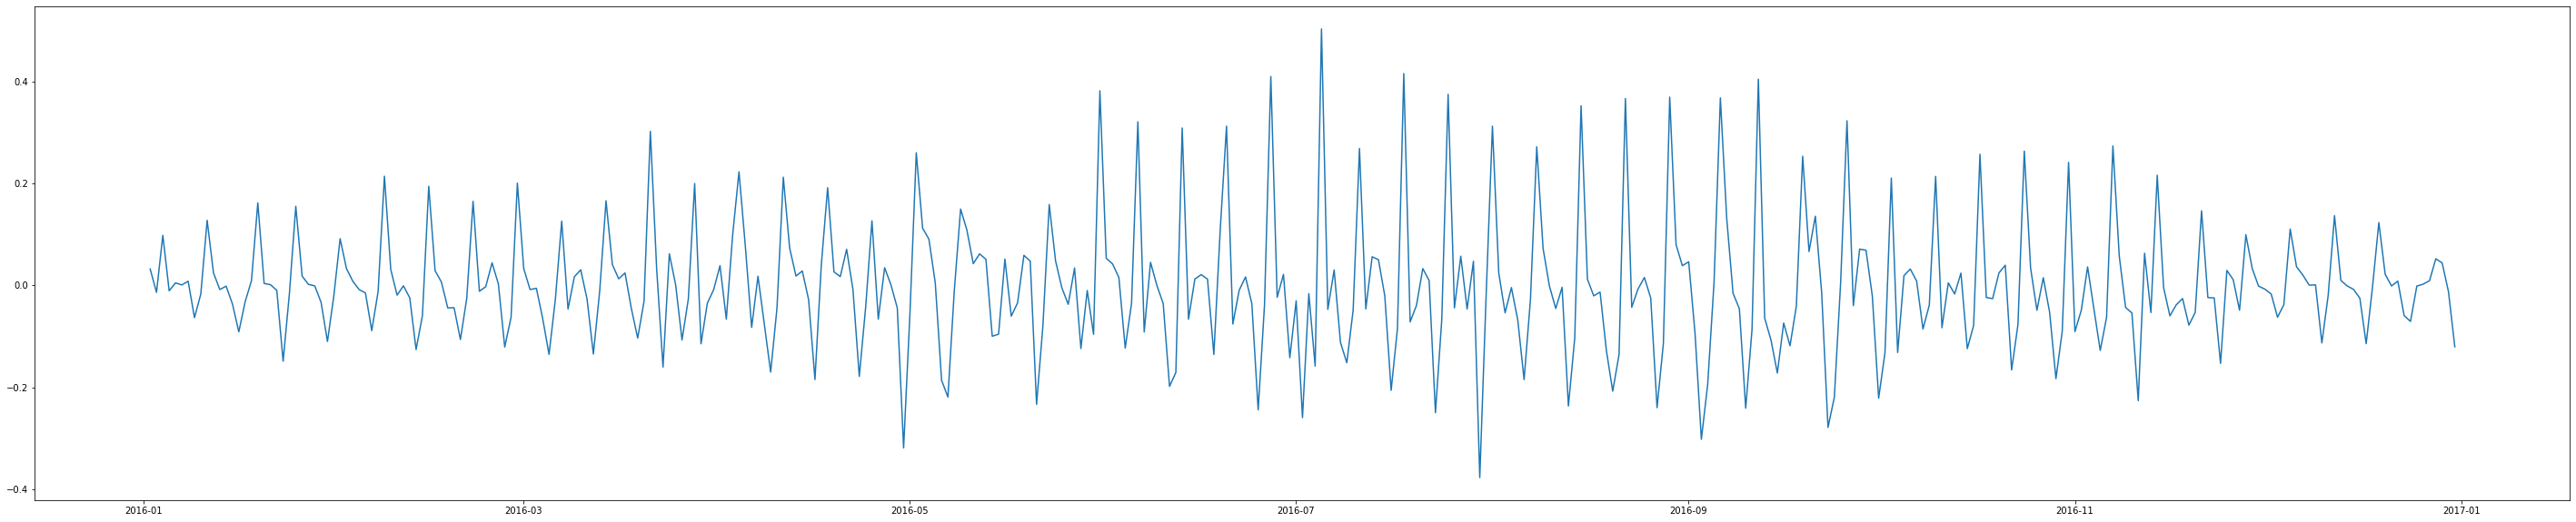

In [80]:

fig = plt.figure(figsize=(50,10))
plt.plot(scaled_daily_total2.meter_reading.diff(1).dropna())

In [81]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
timestamp,,,,,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.029630,0.567326,0.005754,1,1,0,0,0,0,0,0,0
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.029630,0.579207,0.360500,0,0,0,1,0,0,0,0,1
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.029630,0.576915,0.436953,0,0,0,0,1,0,0,0,1
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.237195,0.589218,0.443120,0,0,1,0,0,0,0,0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.320095,0.679508,0.416002,0,0,0,0,0,0,1,0,0


In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [94]:
scaled_daily_total2_training.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
timestamp,,,,,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.029630,0.567326,0.005754,1,1,0,0,0,0,0,0,0
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.029630,0.579207,0.360500,0,0,0,1,0,0,0,0,1
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.029630,0.576915,0.436953,0,0,0,0,1,0,0,0,1
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.237195,0.589218,0.443120,0,0,1,0,0,0,0,0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.320095,0.679508,0.416002,0,0,0,0,0,0,1,0,0


In [95]:
scaled_daily_total2_test.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
timestamp,,,,,,,,,,,,,,,,,
2016-12-01,840,0.124142,2252,0.096525,0.205076,0.02963,0.822461,0.252481,0,0,0,0,0,1,0,0,0
2016-12-02,839,0.107238,2250,0.112976,0.250400,0.02963,0.765217,0.207128,0,1,0,0,0,0,0,0,0
2016-12-03,833,0.044992,2242,0.141133,0.234672,0.02963,0.721422,0.208127,0,0,0,1,0,0,0,0,1
2016-12-04,831,0.007296,2238,0.174057,0.180697,0.02963,0.736408,0.029422,0,0,0,0,1,0,0,0,1
2016-12-05,840,0.117843,2246,0.167438,0.170663,0.02963,0.756654,0.235405,0,0,1,0,0,0,0,0,0


In [0]:
import statsmodels.api as sm

In [96]:
m2 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r2 = m2.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 406.163
Method:                       css-mle   S.D. of innovations              0.071
Date:                Tue, 26 Nov 2019   AIC                           -776.326
Time:                        03:48:44   BIC                           -707.726
Sample:                    01-02-2016   HQIC                          -748.974
                         - 11-30-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0646        nan        nan        nan         nan         nan
air_temperature           0.0397      0.010      4.089      0.000       0.021       0.059
dew_temp

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [97]:
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 406.163
Method:                       css-mle   S.D. of innovations              0.071
Date:                Tue, 26 Nov 2019   AIC                           -776.326
Time:                        03:49:16   BIC                           -707.726
Sample:                    01-02-2016   HQIC                          -748.974
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0646        nan        nan        nan         nan         nan
air_temperature           0.0397      0.010      4.089      0.000       0.021       0.059
dew_temperature          -0.0261      0.011     -2.424      0.016      -0.047      -0.005
precip_depth_1_hr        -0.0166      0.037     -0.449      0.654      -0.089       0.056
sea_level_pressure       -0.0372      0.009     -3.994      0.000      -0.055      -0.019
wind_speed               -0.1075      0.022     -4.974      0.000      -0.150      -0.065
holiday                  -0.1648      0.031     -5.276      0.000      -0.226      -0.104
Friday                   -0.0472        nan        nan        nan         nan         nan
Monday                    0.2168        nan        nan        nan         nan         nan
Saturday                 -0.0945      8.079     -0.012      0.991     -15.929      15.740
Sunday                    0.0131      8.079      0.002      0.999     -15.822      15.848
Thursday                 -0.0125        nan        nan        nan         nan         nan
Tuesday                   0.0148        nan        nan        nan         nan         nan
Wednesday                -0.0158        nan        nan        nan         nan         nan
weekend                  -0.0819      8.100     -0.010      0.992     -15.958      15.795
ar.L1.D.meter_reading     0.7612      0.050     15.122      0.000       0.663       0.860
ma.L1.D.meter_reading    -0.9998      0.008   -119.664      0.000      -1.016      -0.983
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3136           +0.0000j            1.3136            0.0000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend
timestamp,,,,,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.029630,0.567326,0.005754,1,1,0,0,0,0,0,0,0
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.029630,0.579207,0.360500,0,0,0,1,0,0,0,0,1
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.029630,0.576915,0.436953,0,0,0,0,1,0,0,0,1
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.237195,0.589218,0.443120,0,0,1,0,0,0,0,0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.320095,0.679508,0.416002,0,0,0,0,0,0,1,0,0


In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [103]:
m2 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r2 = m2.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [104]:
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 286.598
Method:                       css-mle   S.D. of innovations              0.102
Date:                Tue, 26 Nov 2019   AIC                           -551.196
Time:                        03:52:39   BIC                           -509.273
Sample:                    01-02-2016   HQIC                          -534.480
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0770      0.011      7.189      0.000       0.056       0.098
air_temperature           0.0358      0.010      3.633      0.000       0.016       0.055
dew_temperature          -0.0344      0.011     -3.033      0.003      -0.057      -0.012
precip_depth_1_hr         0.0376      0.042      0.905      0.366      -0.044       0.119
sea_level_pressure       -0.0332      0.009     -3.676      0.000      -0.051      -0.016
wind_speed               -0.0676      0.019     -3.489      0.001      -0.106      -0.030
holiday                  -0.0364      0.031     -1.156      0.248      -0.098       0.025
weekend                  -0.1404      0.015     -9.675      0.000      -0.169      -0.112
ar.L1.D.meter_reading     0.5824      0.050     11.555      0.000       0.484       0.681
ma.L1.D.meter_reading    -0.9993      0.008   -125.654      0.000      -1.015      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7170           +0.0000j            1.7170            0.0000
MA.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns = ['precip_depth_1_hr'])

In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [107]:
m2 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r2 = m2.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [108]:
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 286.210
Method:                       css-mle   S.D. of innovations              0.102
Date:                Tue, 26 Nov 2019   AIC                           -552.419
Time:                        03:53:51   BIC                           -514.308
Sample:                    01-02-2016   HQIC                          -537.224
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0825      0.009      9.024      0.000       0.065       0.100
air_temperature           0.0300      0.008      3.879      0.000       0.015       0.045
dew_temperature          -0.0257      0.006     -4.098      0.000      -0.038      -0.013
sea_level_pressure       -0.0384      0.007     -5.243      0.000      -0.053      -0.024
wind_speed               -0.0680      0.020     -3.383      0.001      -0.107      -0.029
holiday                  -0.0431      0.031     -1.386      0.167      -0.104       0.018
weekend                  -0.1423      0.014     -9.915      0.000      -0.170      -0.114
ar.L1.D.meter_reading     0.6008      0.046     13.008      0.000       0.510       0.691
ma.L1.D.meter_reading    -0.9996      0.008   -125.217      0.000      -1.015      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6643           +0.0000j            1.6643            0.0000
MA.1            1.0004           +0.0000j            1.0004            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
prediction =r2.predict(start='2016-12-01', end = '2016-12-31' , exog = scaled_daily_total2_test.iloc[:,3:])

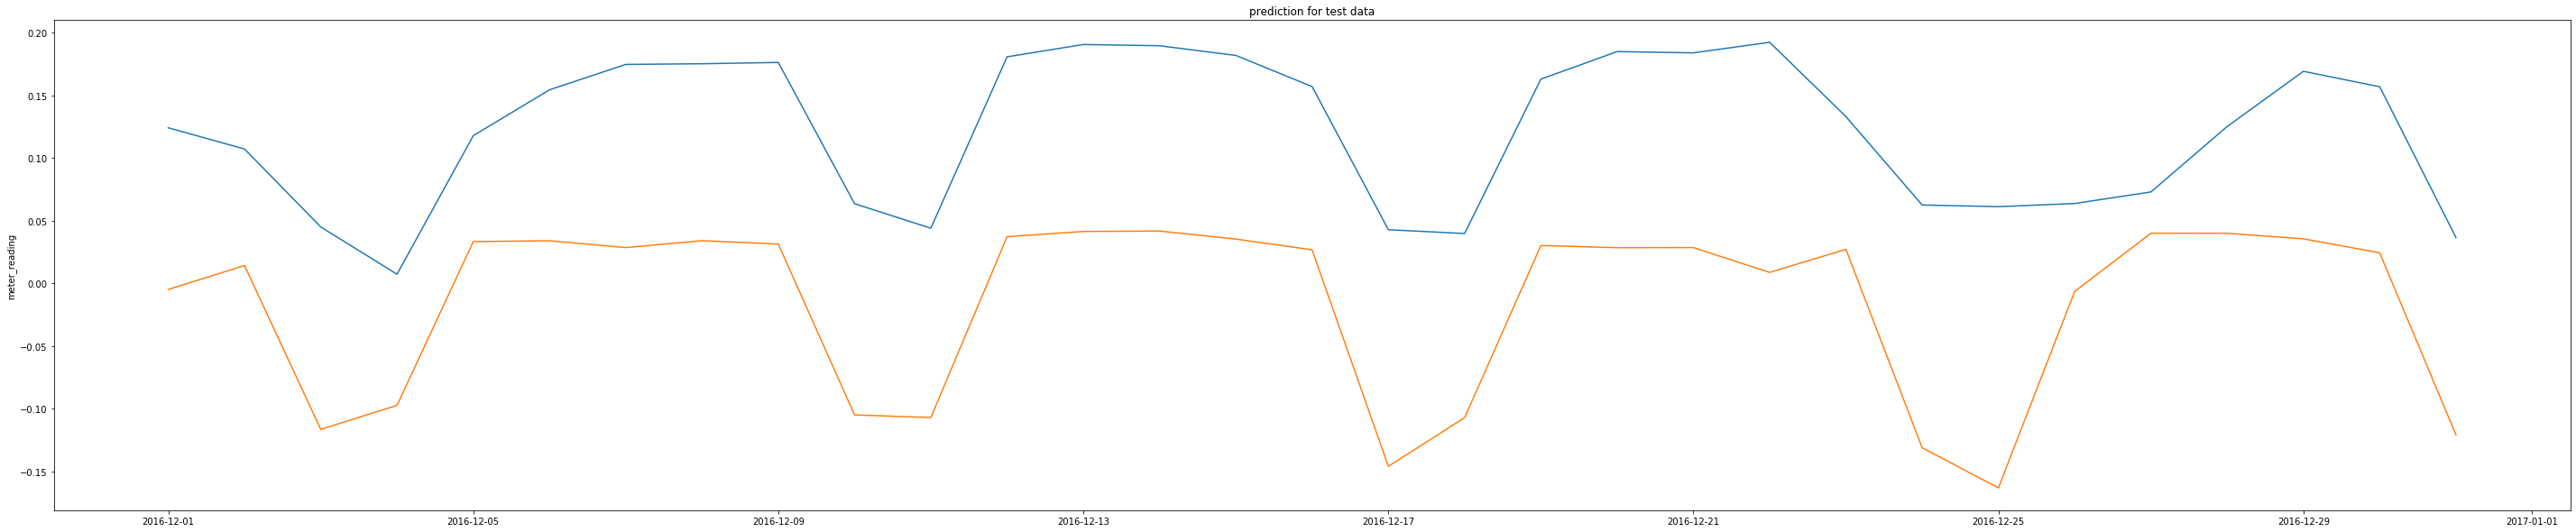

In [117]:
figure = plt.figure(figsize=(50,10))

plt.title("prediction for test data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_test.meter_reading)
plt.plot(prediction)

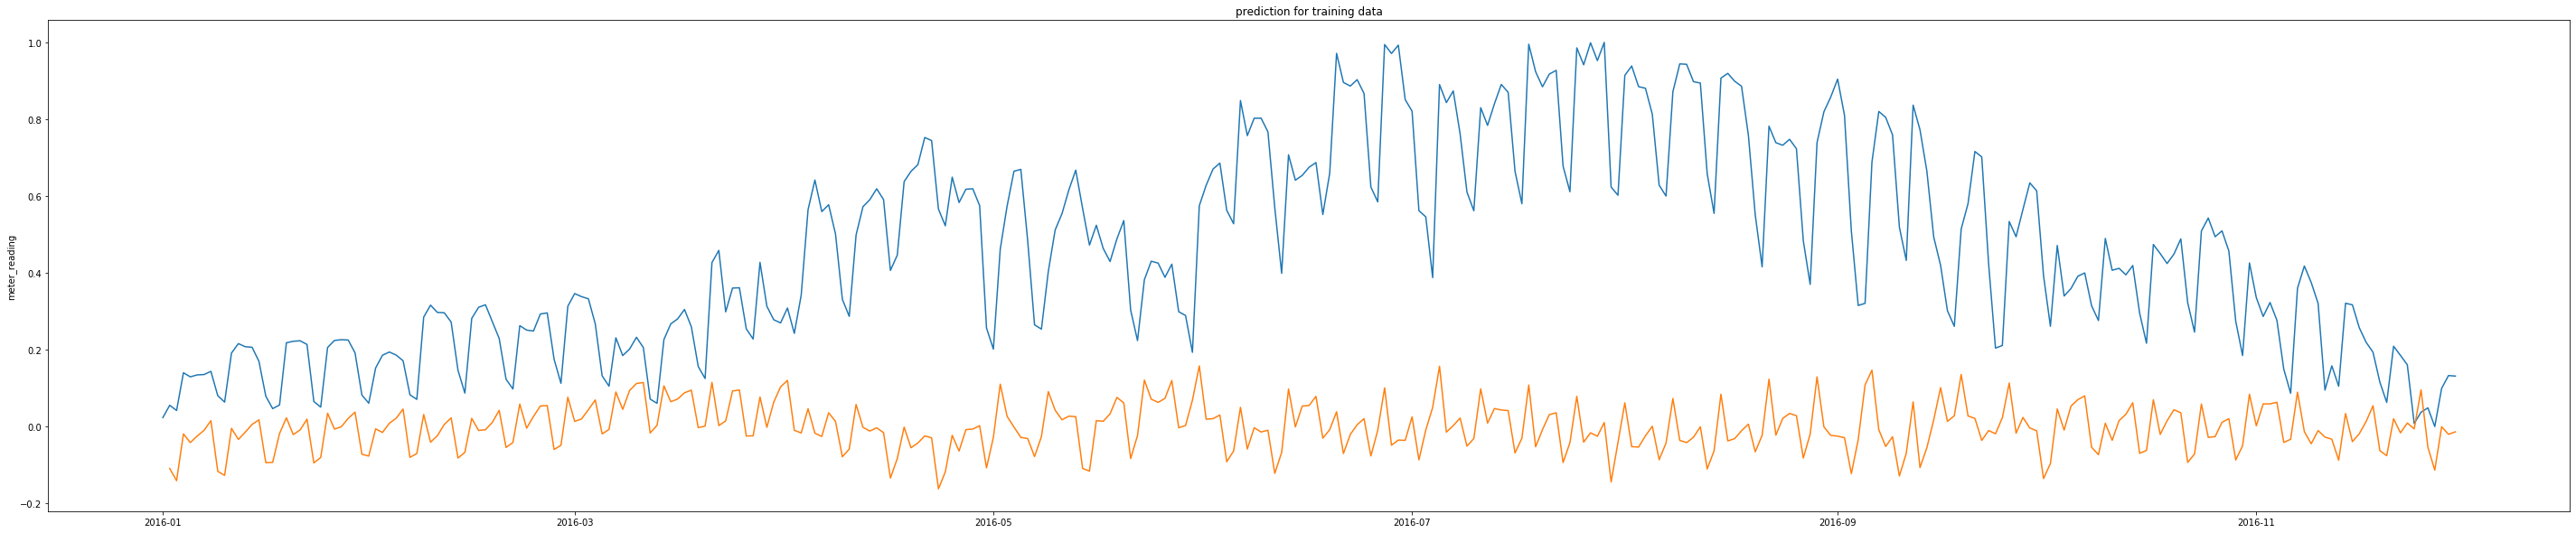

In [119]:
figure = plt.figure(figsize=(50,10))

plt.title("prediction for training data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_training.meter_reading)
plt.plot(r2.predict())

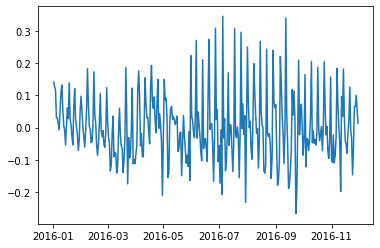

In [120]:
plt.plot(r2.resid)

In [122]:
scaled_daily_total2.air_temperature.quantile(q=0.90)

0.8829784903242014

In [123]:
scaled_daily_total2.air_temperature.quantile(q=0.1)

0.17082034737551008

In [0]:
upper_outlier = scaled_daily_total2.air_temperature >= scaled_daily_total2.air_temperature.quantile(q=0.90)

In [0]:
lower_outlier = scaled_daily_total2.air_temperature <= scaled_daily_total2.air_temperature.quantile(q=0.1)

In [0]:
upper_outlier = upper_outlier.astype('int64')

In [0]:
lower_outlier = lower_outlier.astype('int64')

In [0]:
scaled_daily_total2['hot'] = upper_outlier
scaled_daily_total2['cold'] = lower_outlier

In [137]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold
timestamp,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1


In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [139]:
m2 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r2 = m2.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [140]:
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 288.161
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -552.322
Time:                        04:09:05   BIC                           -506.588
Sample:                    01-02-2016   HQIC                          -534.087
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0621      0.014      4.582      0.000       0.036       0.089
air_temperature           0.0300      0.012      2.546      0.011       0.007       0.053
dew_temperature          -0.0362      0.009     -4.102      0.000      -0.053      -0.019
sea_level_pressure       -0.0154      0.013     -1.146      0.253      -0.042       0.011
wind_speed               -0.0420      0.023     -1.820      0.070      -0.087       0.003
holiday                  -0.0663      0.033     -1.991      0.047      -0.132      -0.001
weekend                  -0.1389      0.014     -9.674      0.000      -0.167      -0.111
hot                       0.0088      0.006      1.416      0.158      -0.003       0.021
cold                      0.0111      0.010      1.158      0.248      -0.008       0.030
ar.L1.D.meter_reading     0.5870      0.046     12.691      0.000       0.496       0.678
ma.L1.D.meter_reading    -0.9998      0.008   -127.253      0.000      -1.015      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7036           +0.0000j            1.7036            0.0000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
upper_outlier = scaled_daily_total2.air_temperature >= scaled_daily_total2.air_temperature.quantile(q=0.9)
lower_outlier = scaled_daily_total2.air_temperature <= scaled_daily_total2.air_temperature.quantile(q=0.1)

upper_outlier = upper_outlier.astype('int64')
lower_outlier = lower_outlier.astype('int64')

scaled_daily_total2['hot'] = upper_outlier
scaled_daily_total2['cold'] = lower_outlier

In [167]:
lower_outlier.head()

timestamp
2016-01-01    1
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    1
Name: air_temperature, dtype: int64

In [168]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold
timestamp,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1


In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [182]:
m3 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r3 = m3.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [183]:
r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 288.161
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -552.322
Time:                        04:21:30   BIC                           -506.588
Sample:                    01-02-2016   HQIC                          -534.087
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0621      0.014      4.582      0.000       0.036       0.089
air_temperature           0.0300      0.012      2.546      0.011       0.007       0.053
dew_temperature          -0.0362      0.009     -4.102      0.000      -0.053      -0.019
sea_level_pressure       -0.0154      0.013     -1.146      0.253      -0.042       0.011
wind_speed               -0.0420      0.023     -1.820      0.070      -0.087       0.003
holiday                  -0.0663      0.033     -1.991      0.047      -0.132      -0.001
weekend                  -0.1389      0.014     -9.674      0.000      -0.167      -0.111
hot                       0.0088      0.006      1.416      0.158      -0.003       0.021
cold                      0.0111      0.010      1.158      0.248      -0.008       0.030
ar.L1.D.meter_reading     0.5870      0.046     12.691      0.000       0.496       0.678
ma.L1.D.meter_reading    -0.9998      0.008   -127.253      0.000      -1.015      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7036           +0.0000j            1.7036            0.0000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

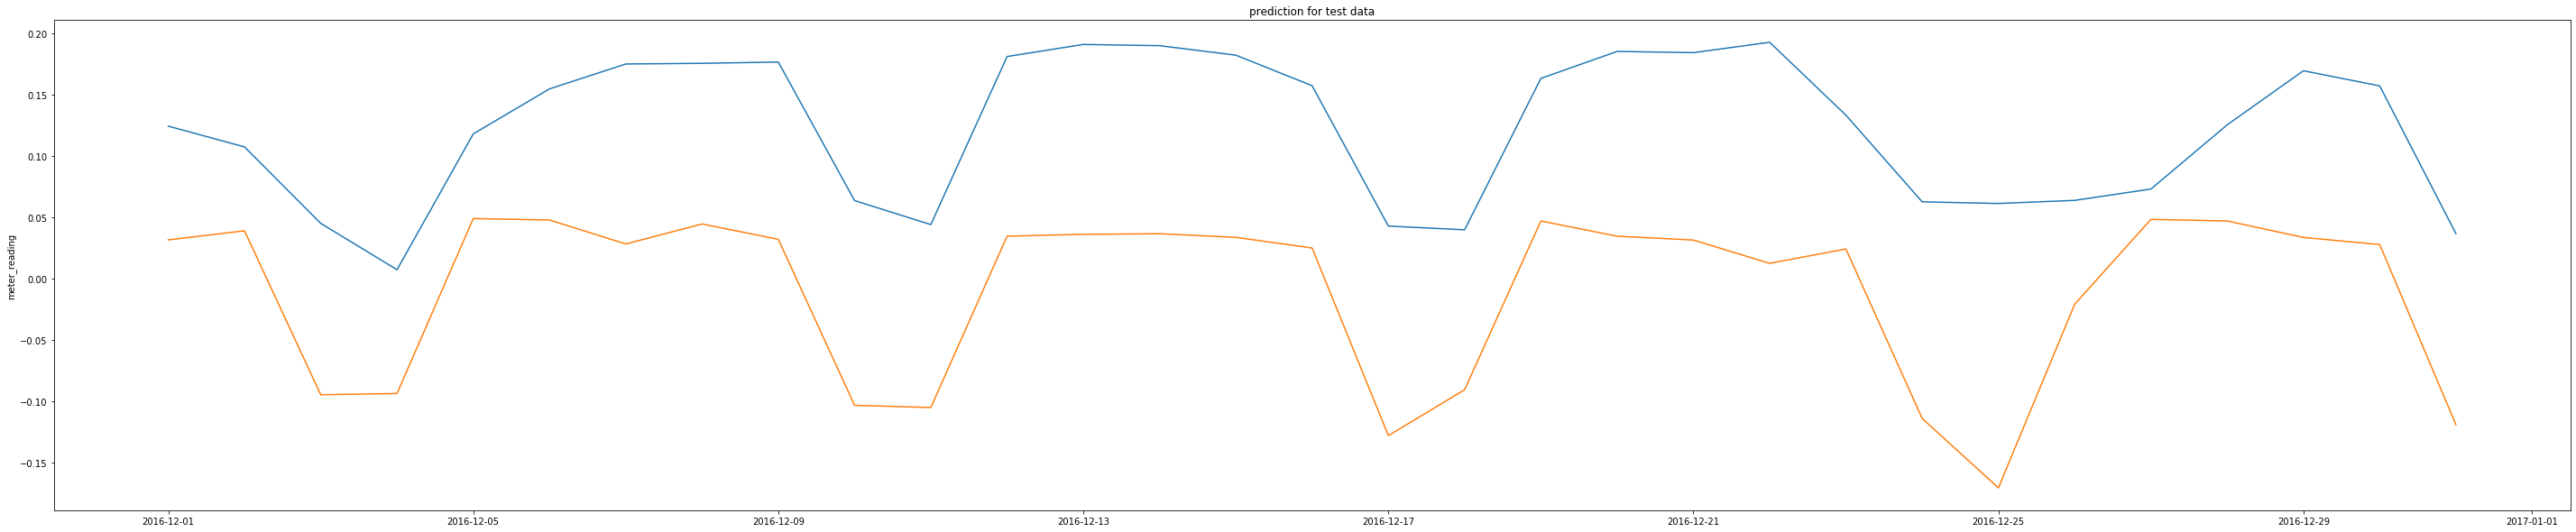

In [184]:
prediction =r2.predict(start='2016-12-01', end = '2016-12-31' , exog = scaled_daily_total2_test.iloc[:,3:])

figure = plt.figure(figsize=(50,10))

plt.title("prediction for test data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_test.meter_reading)
plt.plot(prediction)

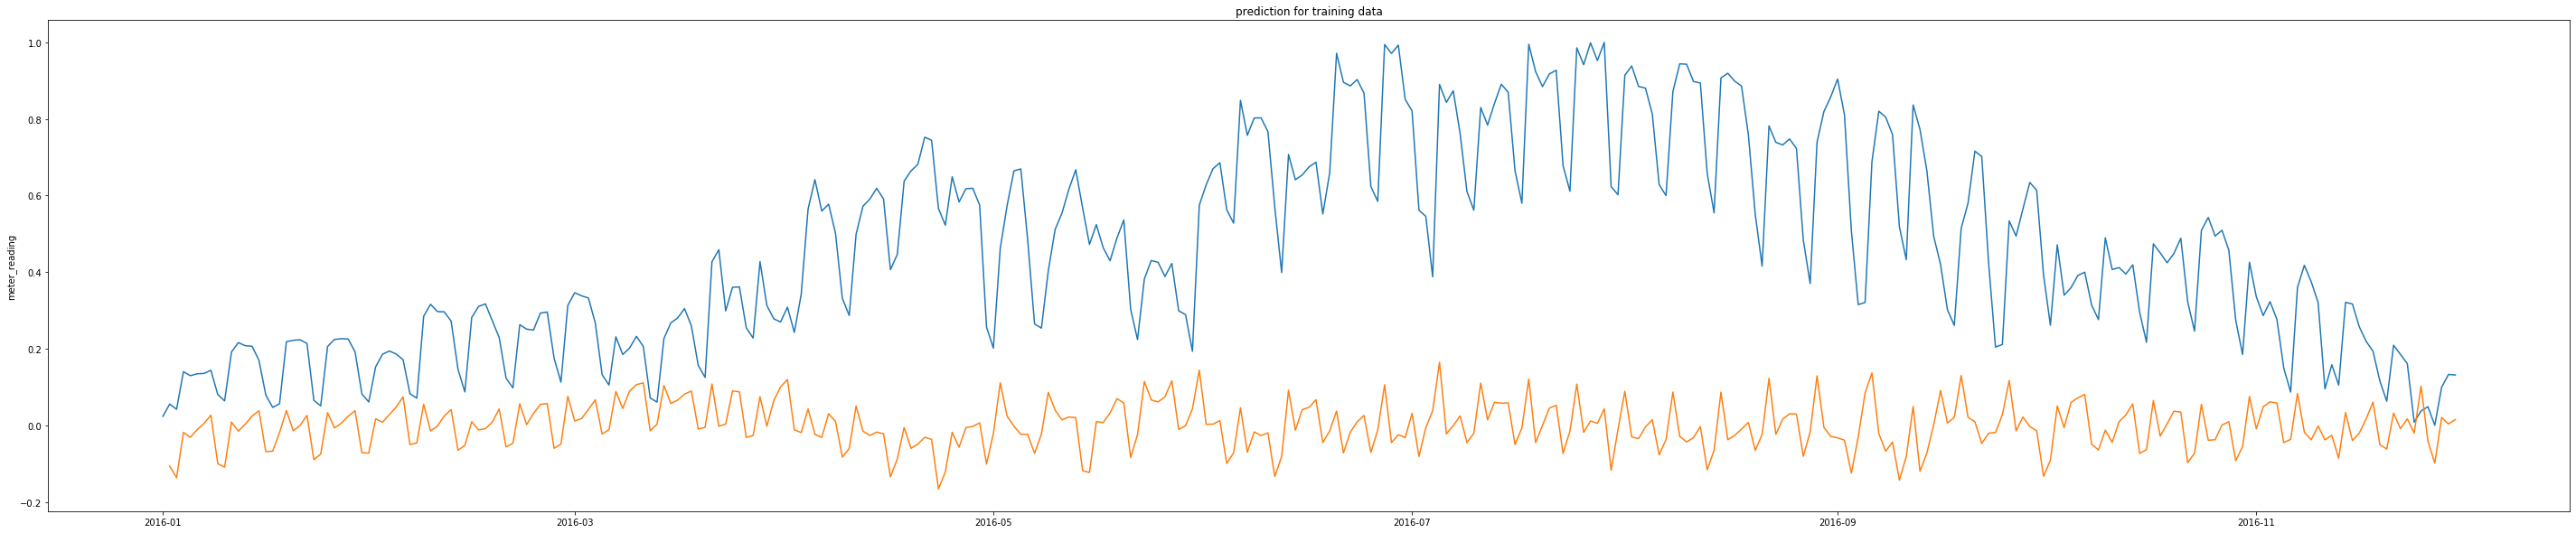

In [185]:
figure = plt.figure(figsize=(50,10))

plt.title("prediction for training data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_training.meter_reading)
plt.plot(r2.predict())

In [188]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold
timestamp,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1


In [0]:
scaled_daily_total2['cold_temperature'] = scaled_daily_total2.meter_reading * scaled_daily_total2.cold
scaled_daily_total2['hot_temperature'] =scaled_daily_total2.meter_reading * scaled_daily_total2.hot

In [192]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold,cold_temperature,hot_temperature
timestamp,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1,0.023241,0.0
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0,0.000000,0.0
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0,0.000000,0.0
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0,0.000000,0.0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1,0.129393,0.0


In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [194]:
m4 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r4 = m4.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [195]:
r4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 290.004
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -552.009
Time:                        04:29:09   BIC                           -498.653
Sample:                    01-02-2016   HQIC                          -530.735
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0611      0.015      4.127      0.000       0.032       0.090
air_temperature           0.0362      0.013      2.756      0.006       0.010       0.062
dew_temperature          -0.0440      0.011     -3.839      0.000      -0.066      -0.022
sea_level_pressure       -0.0128      0.014     -0.895      0.371      -0.041       0.015
wind_speed               -0.0455      0.024     -1.907      0.057      -0.092       0.001
holiday                  -0.0635      0.034     -1.857      0.064      -0.130       0.004
weekend                  -0.1383      0.015     -9.387      0.000      -0.167      -0.109
hot                      -0.0706      0.071     -0.996      0.320      -0.210       0.068
cold                      0.0959      0.052      1.863      0.063      -0.005       0.197
cold_temperature         -0.5567      0.345     -1.615      0.107      -1.232       0.119
hot_temperature           0.0984      0.087      1.124      0.262      -0.073       0.270
ar.L1.D.meter_reading     0.5938      0.047     12.539      0.000       0.501       0.687
ma.L1.D.meter_reading    -0.9995      0.008   -128.442      0.000      -1.015      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6841           +0.0000j            1.6841            0.0000
MA.1            1.0005           +0.0000j            1.0005            0.0000
-----------------------------------------------------------------------------
"""

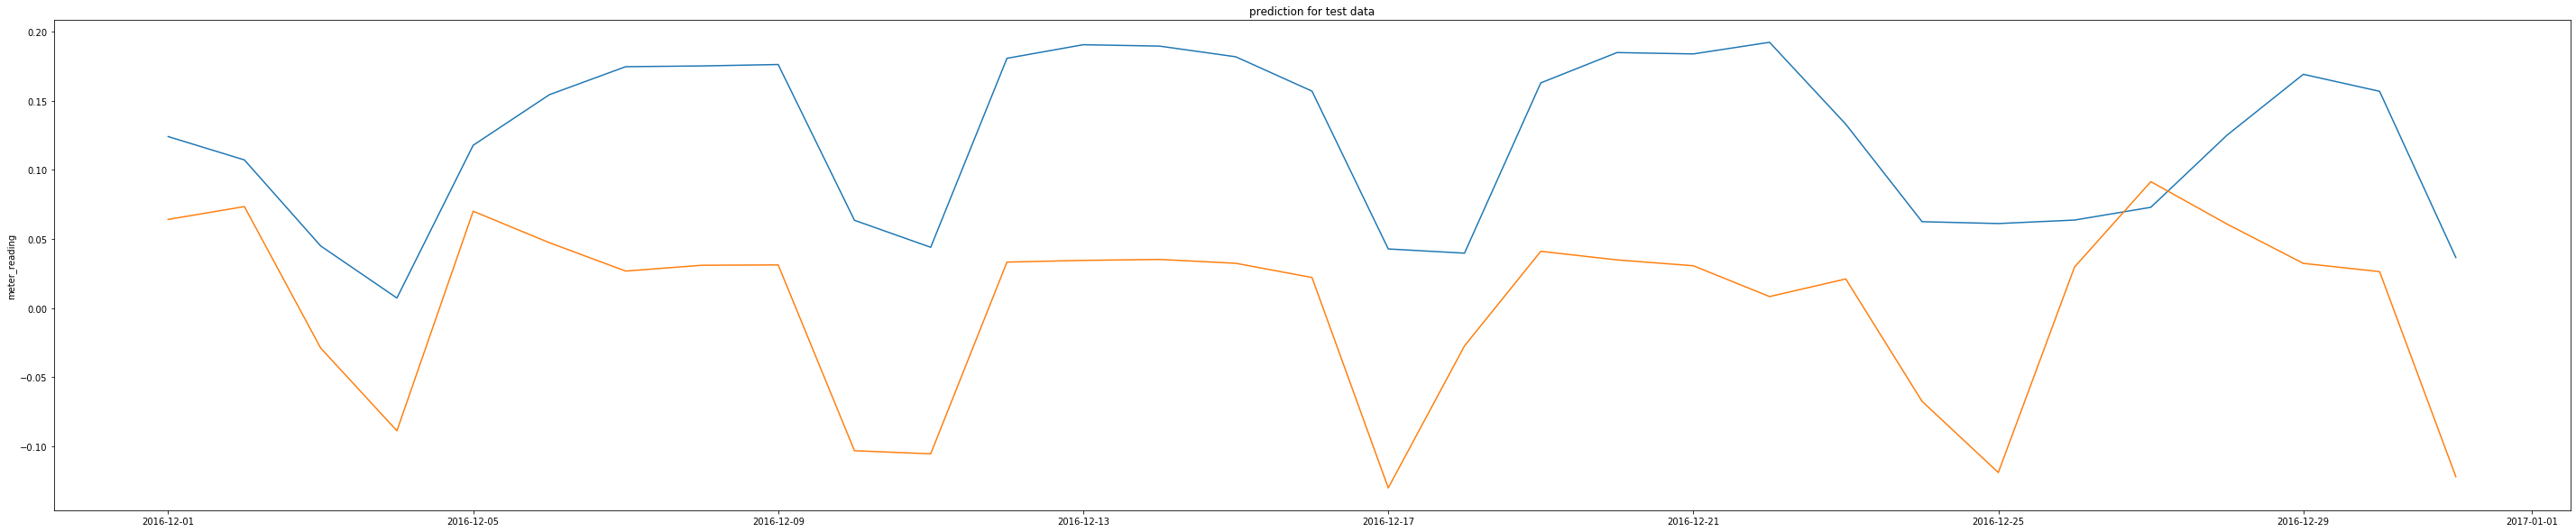

In [196]:
prediction =r4.predict(start='2016-12-01', end = '2016-12-31' , exog = scaled_daily_total2_test.iloc[:,3:])

figure = plt.figure(figsize=(50,10))

plt.title("prediction for test data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_test.meter_reading)
plt.plot(prediction)

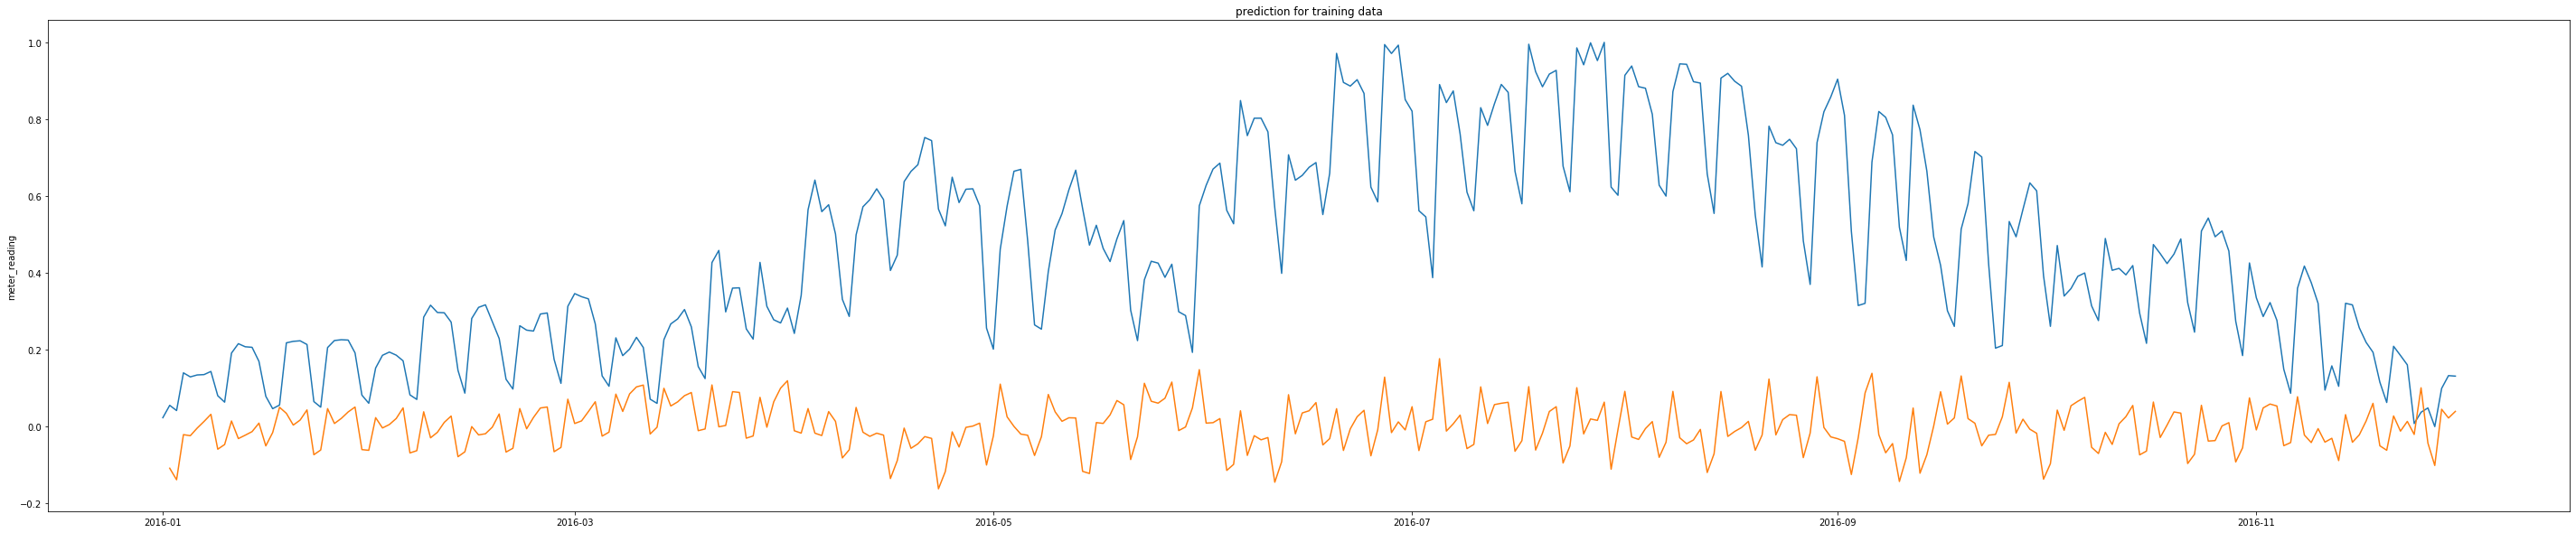

In [197]:
figure = plt.figure(figsize=(50,10))

plt.title("prediction for training data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_training.meter_reading)
plt.plot(r4.predict())

In [0]:
scaled_daily_total2['cold_temperature^2'] = scaled_daily_total2.cold_temperature**2
scaled_daily_total2['hot_temperature^2'] =scaled_daily_total2.hot_temperature**2

In [202]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold,cold_temperature,hot_temperature,cold_temperature^2,hot_temperature^2
timestamp,,,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1,0.023241,0.0,0.000540,0.0
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0,0.000000,0.0,0.000000,0.0
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0,0.000000,0.0,0.000000,0.0
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0,0.000000,0.0,0.000000,0.0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1,0.129393,0.0,0.016742,0.0


In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [205]:
m5 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r5 = m5.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [206]:
r5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 289.690
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -547.381
Time:                        04:36:49   BIC                           -486.402
Sample:                    01-02-2016   HQIC                          -523.068
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0589      0.015      3.854      0.000       0.029       0.089
air_temperature           0.0347      0.013      2.579      0.010       0.008       0.061
dew_temperature          -0.0446      0.012     -3.800      0.000      -0.068      -0.022
sea_level_pressure       -0.0095      0.015     -0.637      0.525      -0.039       0.020
wind_speed               -0.0419      0.025     -1.684      0.093      -0.091       0.007
holiday                  -0.0666      0.036     -1.849      0.065      -0.137       0.004
weekend                  -0.1380      0.015     -9.353      0.000      -0.167      -0.109
hot                       0.0447      0.347      0.129      0.898      -0.635       0.725
cold                      0.1583      0.100      1.579      0.115      -0.038       0.355
cold_temperature         -1.8360      1.672     -1.098      0.273      -5.113       1.441
hot_temperature          -0.2261      0.943     -0.240      0.811      -2.075       1.622
cold_temperature^2        5.0268      6.221      0.808      0.420      -7.165      17.219
hot_temperature^2         0.2180      0.616      0.354      0.724      -0.990       1.426
ar.L1.D.meter_reading     0.6041      0.048     12.530      0.000       0.510       0.699
ma.L1.D.meter_reading    -1.0000      0.008   -129.564      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6553           +0.0000j            1.6553            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns = ['cold_temperature^2','hot_temperature^2'])

In [0]:
scaled_daily_total2['air_temperature^2'] = (scaled_daily_total2.air_temperature+1)**2

In [216]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold,cold_temperature,hot_temperature,air_temperature^2
timestamp,,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1,0.023241,0.0,1.131893
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0,0.000000,0.0,1.406007
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0,0.000000,0.0,1.525351
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0,0.000000,0.0,1.554612
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1,0.129393,0.0,1.313987


In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [218]:
m6 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r6 = m6.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [219]:
r6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 289.823
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -549.645
Time:                        04:58:09   BIC                           -492.478
Sample:                    01-02-2016   HQIC                          -526.852
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0769      0.037      2.063      0.040       0.004       0.150
air_temperature           0.1026      0.131      0.786      0.432      -0.153       0.358
dew_temperature          -0.0414      0.012     -3.510      0.001      -0.065      -0.018
sea_level_pressure       -0.0151      0.015     -1.002      0.317      -0.045       0.014
wind_speed               -0.0435      0.024     -1.788      0.075      -0.091       0.004
holiday                  -0.0538      0.034     -1.570      0.118      -0.121       0.013
weekend                  -0.1363      0.015     -9.246      0.000      -0.165      -0.107
hot                      -0.0653      0.071     -0.924      0.356      -0.204       0.073
cold                      0.0603      0.051      1.172      0.242      -0.041       0.161
cold_temperature         -0.2850      0.352     -0.810      0.419      -0.975       0.405
hot_temperature           0.0947      0.087      1.083      0.280      -0.077       0.266
air_temperature^2        -0.0219      0.042     -0.522      0.602      -0.104       0.060
ar.L1.D.meter_reading     0.5907      0.047     12.492      0.000       0.498       0.683
ma.L1.D.meter_reading    -0.9988      0.008   -126.314      0.000      -1.014      -0.983
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6930           +0.0000j            1.6930            0.0000
MA.1            1.0012           +0.0000j            1.0012            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns='air_temperature^2')

In [0]:
scaled_daily_total2['winter'] = 0

In [230]:
scaled_daily_total2.head()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold,cold_temperature,hot_temperature,winter
timestamp,,,,,,,,,,,,,,
2016-01-01,817,0.023241,2210,0.063905,0.171951,0.567326,0.005754,1,0,0,1,0.023241,0.0,0
2016-01-02,816,0.055394,2208,0.185752,0.318427,0.579207,0.360500,0,1,0,0,0.000000,0.0,0
2016-01-03,818,0.041774,2212,0.235051,0.314555,0.576915,0.436953,0,1,0,0,0.000000,0.0,0
2016-01-04,831,0.139954,2228,0.246841,0.380666,0.589218,0.443120,0,0,0,0,0.000000,0.0,0
2016-01-05,832,0.129393,2236,0.146293,0.627745,0.679508,0.416002,0,0,0,1,0.129393,0.0,0


In [239]:
scaled_daily_total2['2016-01-01':'2016-02-28'].shape

(59, 14)

In [242]:
scaled_daily_total2.index.get_loc('2016-02-28')

58

In [0]:
scaled_daily_total2.iloc[:59,13] = 1

In [249]:
scaled_daily_total2.index.get_loc('2016-11-01')

305

In [0]:
scaled_daily_total2.iloc[305:,13] = 1

In [251]:
scaled_daily_total2.tail()

,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_speed,holiday,weekend,hot,cold,cold_temperature,hot_temperature,winter
timestamp,,,,,,,,,,,,,,
2016-12-27,840,0.072940,2242,0.123017,0.369899,0.881785,0.041103,0,0,0,1,0.072940,0.0,1
2016-12-28,840,0.125193,2250,0.167778,0.475330,0.919884,0.000000,0,0,0,1,0.125193,0.0,1
2016-12-29,840,0.169212,2252,0.227248,0.489251,0.936591,0.077478,0,0,0,0,0.000000,0.0,1
2016-12-30,840,0.156901,2256,0.294965,0.466062,0.918358,0.289695,0,0,0,0,0.000000,0.0,1
2016-12-31,840,0.036592,2256,0.226744,0.671533,0.807330,0.289695,0,1,0,0,0.000000,0.0,1


In [0]:
scaled_daily_total2['summer'] = 0

In [254]:
scaled_daily_total2.index.get_loc('2016-07-01')

182

In [255]:
scaled_daily_total2.index.get_loc('2016-09-01')

244

In [0]:
scaled_daily_total2.iloc[182:245,14] = 1

In [257]:
scaled_daily_total2.iloc[182:245,14]


timestamp
2016-07-01    1
2016-07-02    1
2016-07-03    1
2016-07-04    1
2016-07-05    1
             ..
2016-08-28    1
2016-08-29    1
2016-08-30    1
2016-08-31    1
2016-09-01    1
Name: summer, Length: 63, dtype: int64

In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [260]:
m7 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r7 = m7.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [261]:
r7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 291.646
Method:                       css-mle   S.D. of innovations              0.100
Date:                Tue, 26 Nov 2019   AIC                           -551.291
Time:                        05:21:23   BIC                           -490.313
Sample:                    01-02-2016   HQIC                          -526.978
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0600      0.019      3.124      0.002       0.022       0.098
air_temperature           0.0287      0.017      1.670      0.096      -0.005       0.062
dew_temperature          -0.0530      0.022     -2.412      0.016      -0.096      -0.010
sea_level_pressure        0.0008      0.021      0.038      0.969      -0.041       0.043
wind_speed               -0.0492      0.026     -1.923      0.055      -0.099       0.001
holiday                  -0.0347      0.037     -0.937      0.349      -0.107       0.038
weekend                  -0.1332      0.015     -8.895      0.000      -0.163      -0.104
hot                      -0.0711      0.069     -1.025      0.306      -0.207       0.065
cold                      0.0676      0.054      1.243      0.215      -0.039       0.174
cold_temperature         -0.3015      0.359     -0.840      0.402      -1.005       0.402
hot_temperature           0.1048      0.086      1.223      0.222      -0.063       0.273
winter                   -0.0090      0.005     -1.865      0.063      -0.018       0.000
summer                    0.0042      0.006      0.674      0.501      -0.008       0.016
ar.L1.D.meter_reading     0.5817      0.048     12.060      0.000       0.487       0.676
ma.L1.D.meter_reading    -0.9993      0.008   -129.736      0.000      -1.014      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7190           +0.0000j            1.7190            0.0000
MA.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns='summer')

In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [272]:
m8 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r8 = m8.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [273]:
r8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 291.194
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -554.388
Time:                        05:26:41   BIC                           -501.032
Sample:                    01-02-2016   HQIC                          -533.115
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0597      0.009      6.680      0.000       0.042       0.077
air_temperature           0.0247      0.015      1.676      0.095      -0.004       0.054
dew_temperature          -0.0470      0.008     -5.720      0.000      -0.063      -0.031
wind_speed               -0.0461      0.020     -2.327      0.021      -0.085      -0.007
holiday                  -0.0425      0.036     -1.167      0.244      -0.114       0.029
weekend                  -0.1335      0.014     -9.224      0.000      -0.162      -0.105
hot                      -0.0874      0.068     -1.291      0.198      -0.220       0.045
cold                      0.0696      0.053      1.312      0.190      -0.034       0.174
cold_temperature         -0.3214      0.357     -0.900      0.369      -1.022       0.379
hot_temperature           0.1303      0.082      1.582      0.115      -0.031       0.292
winter                   -0.0087      0.005     -1.805      0.072      -0.018       0.001
ar.L1.D.meter_reading     0.5925      0.048     12.460      0.000       0.499       0.686
ma.L1.D.meter_reading    -0.9999      0.008   -130.676      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6877           +0.0000j            1.6877            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns='cold_temperature')

In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [276]:
m9 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r9 = m9.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [277]:
r9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 290.781
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -555.562
Time:                        05:38:04   BIC                           -506.017
Sample:                    01-02-2016   HQIC                          -535.808
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0596      0.009      6.738      0.000       0.042       0.077
air_temperature           0.0226      0.014      1.571      0.117      -0.006       0.051
dew_temperature          -0.0456      0.008     -5.705      0.000      -0.061      -0.030
wind_speed               -0.0455      0.020     -2.325      0.021      -0.084      -0.007
holiday                  -0.0356      0.035     -1.008      0.314      -0.105       0.034
weekend                  -0.1317      0.014     -9.169      0.000      -0.160      -0.104
hot                      -0.0822      0.067     -1.226      0.221      -0.214       0.049
cold                      0.0226      0.009      2.624      0.009       0.006       0.040
hot_temperature           0.1243      0.082      1.522      0.129      -0.036       0.284
winter                   -0.0099      0.005     -2.160      0.031      -0.019      -0.001
ar.L1.D.meter_reading     0.5858      0.048     12.303      0.000       0.493       0.679
ma.L1.D.meter_reading    -1.0000      0.008   -130.271      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7070           +0.0000j            1.7070            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns='hot')

In [0]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [280]:
m10 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r10 = m10.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [281]:
r10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 290.021
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -556.042
Time:                        05:40:06   BIC                           -510.308
Sample:                    01-02-2016   HQIC                          -537.807
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0610      0.009      6.982      0.000       0.044       0.078
air_temperature           0.0161      0.013      1.220      0.223      -0.010       0.042
dew_temperature          -0.0395      0.006     -6.383      0.000      -0.052      -0.027
wind_speed               -0.0429      0.019     -2.232      0.026      -0.081      -0.005
holiday                  -0.0486      0.034     -1.448      0.149      -0.114       0.017
weekend                  -0.1348      0.014     -9.501      0.000      -0.163      -0.107
cold                      0.0205      0.008      2.454      0.015       0.004       0.037
hot_temperature           0.0246      0.007      3.484      0.001       0.011       0.038
winter                   -0.0097      0.005     -2.141      0.033      -0.019      -0.001
ar.L1.D.meter_reading     0.5792      0.047     12.362      0.000       0.487       0.671
ma.L1.D.meter_reading    -1.0000      0.008   -129.684      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7264           +0.0000j            1.7264            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
scaled_daily_total2 = scaled_daily_total2.drop(columns='air_temperature')

scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [283]:
m11 = sm.tsa.ARIMA(scaled_daily_total2_training.meter_reading, (1,1,1), exog=scaled_daily_total2_training.iloc[:,3:])
r11 = m11.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [284]:
r11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.meter_reading   No. Observations:                  334
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 289.282
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 26 Nov 2019   AIC                           -556.565
Time:                        05:42:28   BIC                           -514.642
Sample:                    01-02-2016   HQIC                          -539.850
                         - 11-30-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0653      0.008      7.994      0.000       0.049       0.081
dew_temperature          -0.0327      0.003    -12.549      0.000      -0.038      -0.028
wind_speed               -0.0380      0.019     -2.001      0.046      -0.075      -0.001
holiday                  -0.0299      0.030     -0.993      0.322      -0.089       0.029
weekend                  -0.1343      0.014     -9.455      0.000      -0.162      -0.106
cold                      0.0158      0.008      2.109      0.036       0.001       0.031
hot_temperature           0.0315      0.004      7.072      0.000       0.023       0.040
winter                   -0.0126      0.004     -3.229      0.001      -0.020      -0.005
ar.L1.D.meter_reading     0.5838      0.047     12.361      0.000       0.491       0.676
ma.L1.D.meter_reading    -1.0000      0.008   -129.485      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7129           +0.0000j            1.7129            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

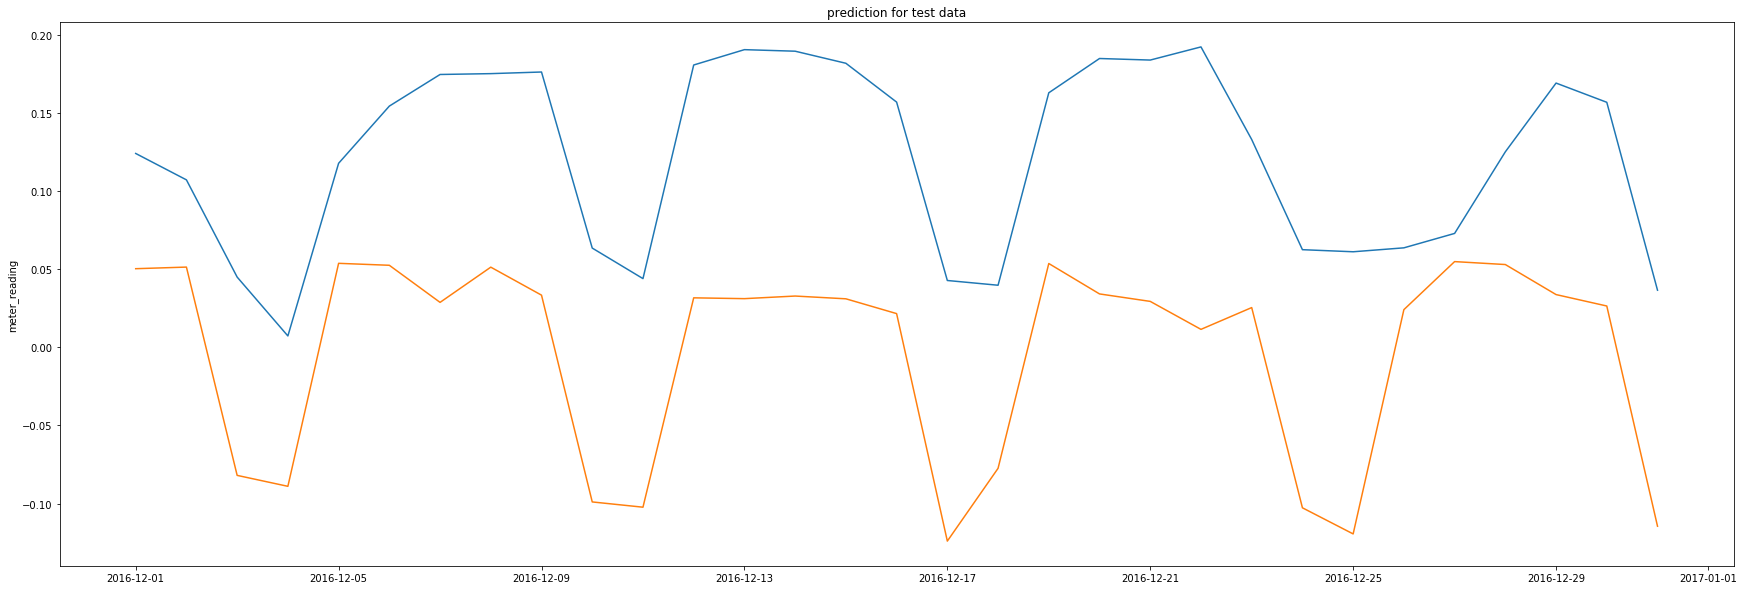

In [288]:
prediction =r11.predict(start='2016-12-01', end = '2016-12-31' , exog = scaled_daily_total2_test.iloc[:,3:])

figure = plt.figure(figsize=(30,10))

plt.title("prediction for test data")
plt.ylabel("meter_reading")
plt.plot(scaled_daily_total2_test.meter_reading)
plt.plot(prediction)

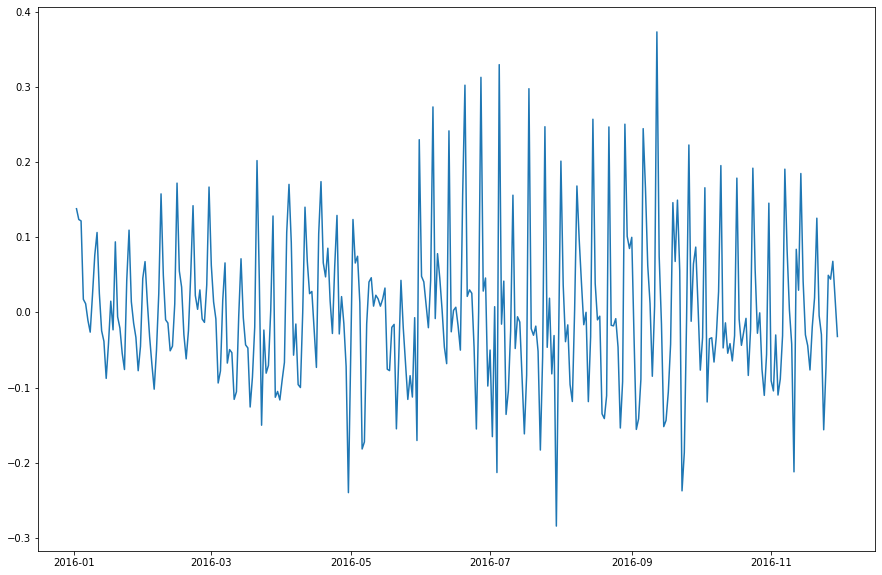

In [291]:
figure = plt.figure(figsize=(15,10))
plt.plot(r11.resid)